_Code to do image preprocessing, that is removing noise such as stains and lines_

### Remove lines from lined paper

In [3]:
#Import external packages

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os

plt.rcParams['figure.figsize'] = (15.0, 9.0)

print("OpenCV: " + cv2.__version__)
print("Numpy: " + np.__version__)
print("Pandas: " + pd.__version__)

OpenCV: 3.1.0
Numpy: 1.15.1
Pandas: 0.23.4


In [5]:
# Import internal packages

#Hack to add parent directory to PYTHONPATH
sys.path.insert(0,os.path.abspath(".."))
print(os.path.abspath(".."))
from aux_functions.helpers import *

print('auxiliary functions loaded')


/home/lorenz/DSR/Diktatkorrektur/child_handwritting_recognition/src
auxiliary functions loaded


TypeError: Image data cannot be converted to float

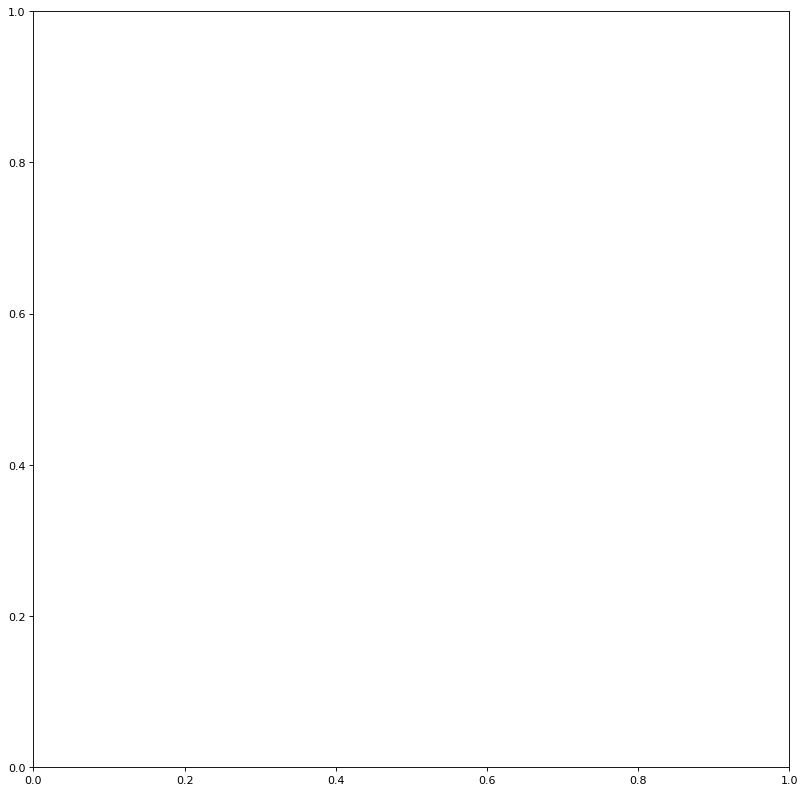

In [6]:
source_dir = os.path.abspath("../../data/")
image_2_orig = cv2.imread(source_dir+'example_text.png')
#image_2 = cv2.cvtColor(image_2_orig, cv2.COLOR_BGR2GRAY)
display_image(image_2_orig)

In [ ]:
img = cv2.bitwise_not(image_2)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
cv2.imwrite('result1.jpg', th2)

horizontal = th2
rows,cols = horizontal.shape

#inverse the image, so that lines are black for masking
# horizontal_inv = cv2.bitwise_not(horizontal)
# cv2.imwrite('result1.5.jpg', horizontal_inv)
# #perform bitwise_and to mask the lines with provided mask
# masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
# cv2.imwrite('result2.jpg', masked_img)
# # reverse the image back to normal
# masked_img_inv = cv2.bitwise_not(masked_img)
# # cv2.imwrite("result3.jpg", th2)
# cv2.imwrite('result4.jpg', masked_img_inv)


horizontalsize = int(cols / 45)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,3))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
cv2.imwrite("horizontal.jpg", horizontal)


#step1
edges = cv2.adaptiveThreshold(horizontal,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
cv2.imwrite("edges.jpg", edges)


#step2
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)
cv2.imwrite("dilated.jpg", dilated)

# step3
smooth = horizontal.copy()

#step 4
smooth = cv2.blur(smooth, (20,20))
cv2.imwrite("smooth.jpg", smooth)


#step 5
(rows, cols) = np.where(img == 0)
horizontal[rows, cols] = smooth[rows, cols]

cv2.imwrite("horizontal_final.jpg", horizontal)